In [75]:
import pandas as pd
from pandas import Series, DataFrame

In [76]:
titanic_df = pd.read_csv('train.csv')

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
styles = plt.style.available
count = len(styles)
print(styles)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [81]:
#fig=plt.figure(figsize=(14,7),facecolor='w')
plt.style.use('seaborn-whitegrid')

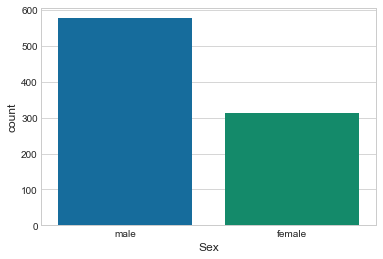

In [82]:
sns.countplot('Sex', data=titanic_df)

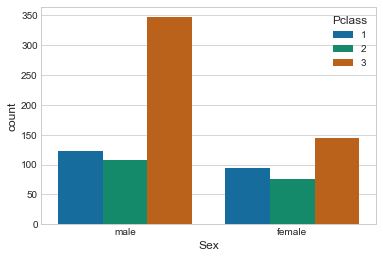

In [83]:
# 乗客の性別と客室を表示
sns.countplot('Sex', data=titanic_df, hue='Pclass')

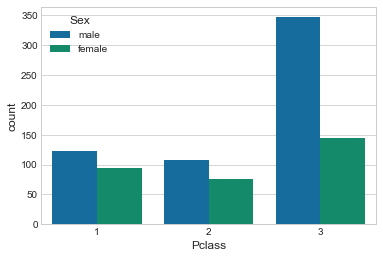

In [84]:
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [85]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [86]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


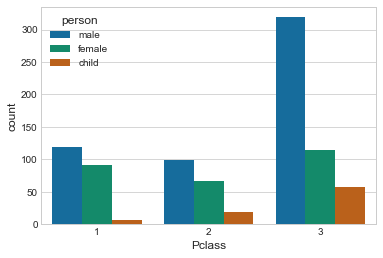

In [87]:
sns.countplot('Pclass', data=titanic_df, hue='person')

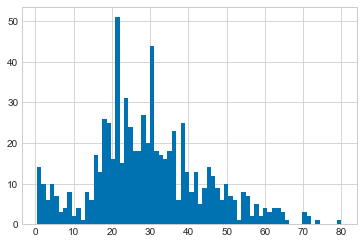

In [88]:
titanic_df['Age'].hist(bins=70)

In [89]:
titanic_df['Age'].mean()

29.69911764705882

In [90]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x1a233a8320>>

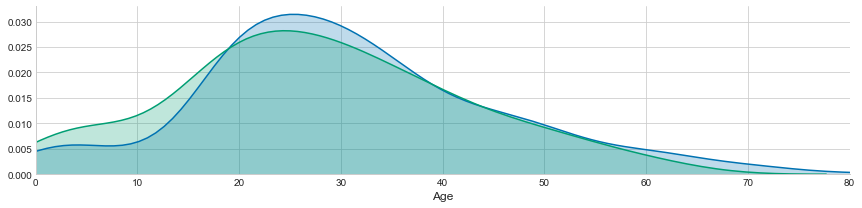

In [91]:
# FacetGrid -> 1つのプロットの中にいくつかのプロットを描画
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
# figのmapメソッドに、kde(カーネル密度推定)のプロットをそれぞれマップする
fig.map(sns.kdeplot, 'Age', shade=True)
'''
実際のヒストグラムと相違して、そのデータから推定されうる分布を描画する(年齢だとマイナスや大きい値も取りうる)
ここではそれを防ぐため、最高齢を選び出しておいてfigureをそこで区切るようにしておく
'''
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x1a234aa9e8>>

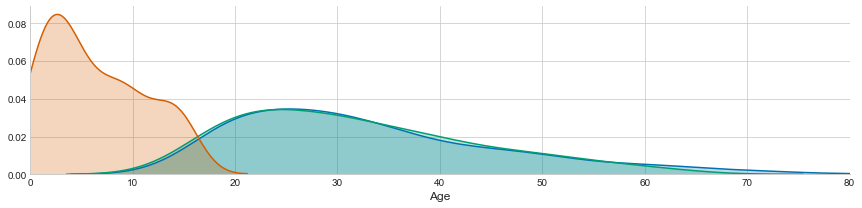

In [92]:
# person
# FacetGrid -> 1つのプロットの中にいくつかのプロットを描画
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
# figのmapメソッドに、kde(カーネル密度推定)のプロットをそれぞれマップする
fig.map(sns.kdeplot, 'Age', shade=True)
'''
実際のヒストグラムと相違して、そのデータから推定されうる分布を描画する(年齢だとマイナスや大きい値も取りうる)
ここではそれを防ぐため、最高齢を選び出しておいてfigureをそこで区切るようにしておく
'''
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x1a23677fd0>>

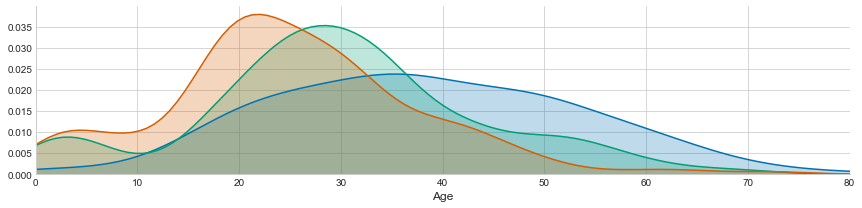

In [93]:
# Pclass
# FacetGrid -> 1つのプロットの中にいくつかのプロットを描画
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
# figのmapメソッドに、kde(カーネル密度推定)のプロットをそれぞれマップする
fig.map(sns.kdeplot, 'Age', shade=True)
'''
実際のヒストグラムと相違して、そのデータから推定されうる分布を描画する(年齢だとマイナスや大きい値も取りうる)
ここではそれを防ぐため、最高齢を選び出しておいてfigureをそこで区切るようにしておく
'''
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend

In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [95]:
# CabinにNull Valueが多いため取り除く
deck = titanic_df['Cabin'].dropna()

In [96]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [97]:
type(deck)

pandas.core.series.Series

In [98]:
# 番号はそのデッキのどの辺にいたかを示すもの
# 高さを知りたければ、1文字目のアルファベットのみわかればよい
levels = []
for level in deck:
    levels.append(level[0])
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [99]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


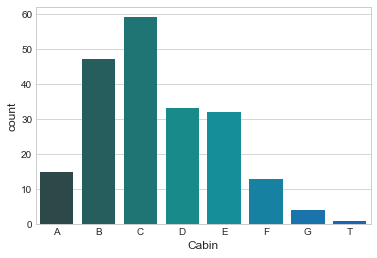

In [100]:
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=sorted(set(levels)))

In [101]:
# Tはおそらく間違えたデータ(Tだけ離れているデータのため)
# これを取り除く
cabin_df = cabin_df[cabin_df.Cabin != 'T']

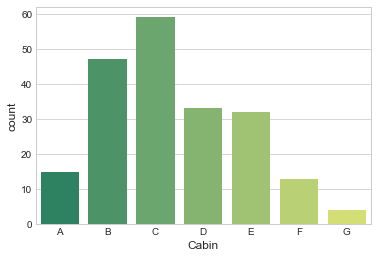

In [102]:
sns.countplot('Cabin', data=cabin_df, palette='summer', order=sorted(set(cabin_df.Cabin)))

In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


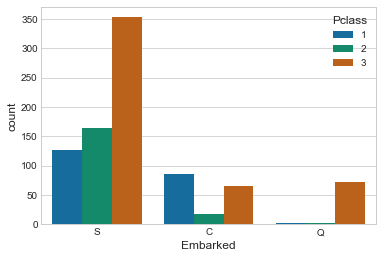

In [104]:
# 乗客がどこから乗ったか
# Embarked 3ヶ所の港を示している(KaggleのDB)
# 乗客が乗った港と客室のランクの相関を見る
sns.countplot('Embarked', data=titanic_df, hue='Pclass')

In [107]:
# 注意事項
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'C': 168, 'Q': 77, 'S': 644, nan: 2})

In [108]:
# null valueが気にならないようになってしまう
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
# 家族連れや単身者の属性を見る
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [110]:
# こんなことも出来る
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/hiraku/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [111]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


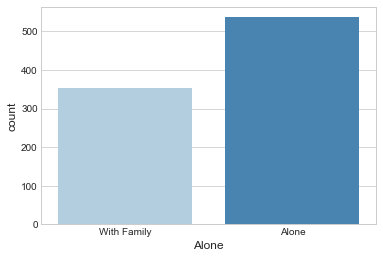

In [112]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

In [113]:
# 生還者を調べる
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

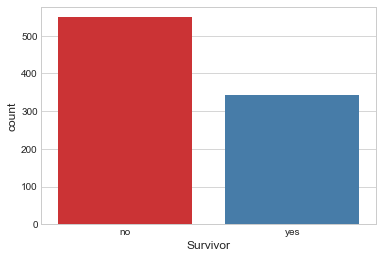

In [114]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

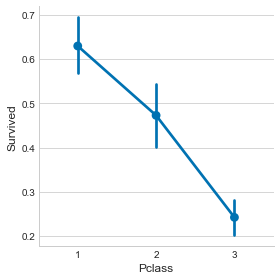

In [115]:
# 生存率と客室のランクを見る
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3])

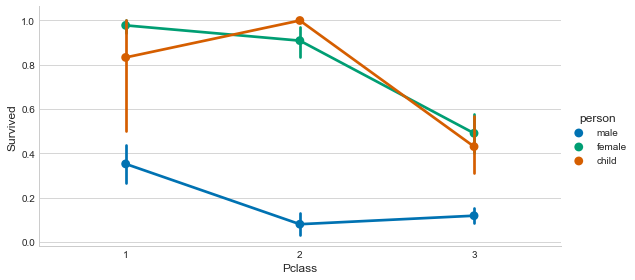

In [116]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3], aspect=2)

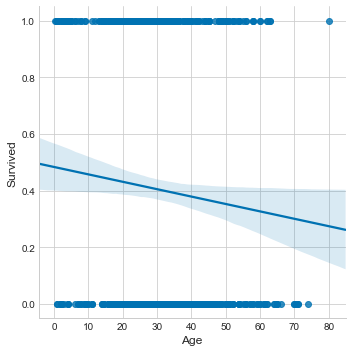

In [118]:
# 生存率と年齢の相関をプロット
sns.lmplot('Age', 'Survived', data=titanic_df)

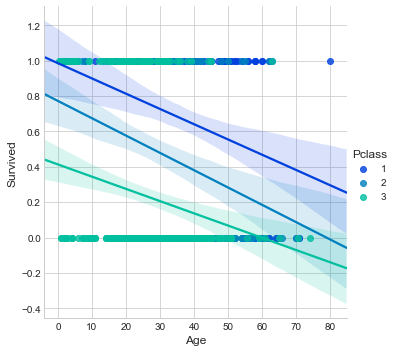

In [120]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=[1,2,3])

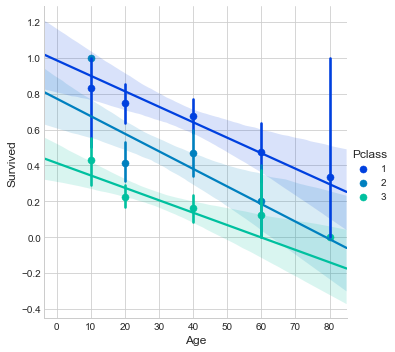

In [121]:
# プロットが見辛いので変更する
generations = [10,20,40,60,80]
# x_bins 年代毎にプロットし、そこの標準偏差を縦棒で表示
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter',
           hue_order=[1,2,3], x_bins=generations)

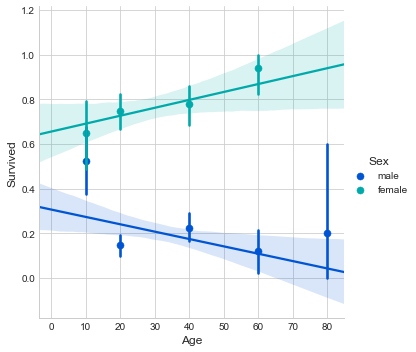

In [122]:
# 性別で層別化
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter',
           x_bins=generations)